# Dimensionality Reduction using Linear Discriminent Analysis (LDA)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

In [11]:
def get_dataset():
  X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, n_classes=10, random_state=42)
  return X, y

In [9]:
def get_models():
  models = dict()
  for i in range(1, 10):
    lda = LinearDiscriminantAnalysis(n_components=i)
    model = GaussianNB()
    steps = [('lda', lda), ('m', model)]
    models[str(i)] = Pipeline(steps=steps)
  return models

In [5]:
def evaluate_models(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return n_scores

In [12]:
X, y = get_dataset()
models = get_models()
results = list()
names = list()
for name, model in models.items():
  score = evaluate_models(model, X, y)
  results.append(score)
  names.append(name)
  print(f"Model: {name}, Accuracy: {np.mean(score):.3f} ({np.std(score):.3f})")

Model: 1, Accuracy: 0.201 (0.033)
Model: 2, Accuracy: 0.278 (0.036)
Model: 3, Accuracy: 0.300 (0.037)
Model: 4, Accuracy: 0.321 (0.043)
Model: 5, Accuracy: 0.334 (0.044)
Model: 6, Accuracy: 0.353 (0.048)
Model: 7, Accuracy: 0.363 (0.051)
Model: 8, Accuracy: 0.377 (0.046)
Model: 9, Accuracy: 0.374 (0.046)


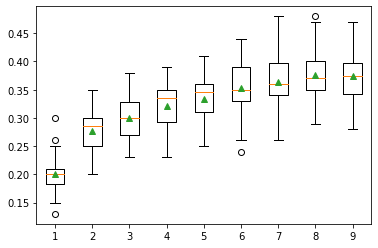

In [13]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()